In [135]:
import numpy as np
import pandas as pd

In [136]:
# Load the datasets
dete_survey = pd.read_csv('dete_survey.csv', na_values=['Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv')

In [137]:
# Display information about the datasets
print("Info for dete_survey:")
dete_survey.info()
print("\nHead of dete_survey:")
print(dete_survey.head())

Info for dete_survey:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   822 non-null    int64  
 1   SeparationType                       822 non-null    object 
 2   Cease Date                           788 non-null    object 
 3   DETE Start Date                      749 non-null    float64
 4   Role Start Date                      724 non-null    float64
 5   Position                             817 non-null    object 
 6   Classification                       455 non-null    object 
 7   Region                               717 non-null    object 
 8   Business Unit                        126 non-null    object 
 9   Employment Status                    817 non-null    object 
 10  Career move to public sector         822 non-null    bool   
 11  Career mov

In [138]:
print("\nInfo for tafe_survey:")
tafe_survey.info()
print("\nHead of tafe_survey:")
print(tafe_survey.head())


Info for tafe_survey:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                           

In [139]:
# Clean the dete_survey DataFrame
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis=1)

In [140]:
# Clean the tafe_survey DataFrame
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis=1)

In [141]:
# Check the shape and first few rows of tafe_survey_updated
print("\nShape of tafe_survey_updated:", tafe_survey_updated.shape)
print(tafe_survey_updated.head())


Shape of tafe_survey_updated: (702, 23)
      Record ID                              Institute  \
0  6.341330e+17  Southern Queensland Institute of TAFE   
1  6.341337e+17            Mount Isa Institute of TAFE   
2  6.341388e+17            Mount Isa Institute of TAFE   
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   

                   WorkArea  CESSATION YEAR Reason for ceasing employment  \
0  Non-Delivery (corporate)          2010.0              Contract Expired   
1  Non-Delivery (corporate)          2010.0                    Retirement   
2       Delivery (teaching)          2010.0                    Retirement   
3  Non-Delivery (corporate)          2010.0                   Resignation   
4       Delivery (teaching)          2010.0                   Resignation   

  Contributing Factors. Career Move - Public Sector   \
0                                                NaN   
1                                  

Since there are many columns that are not essential to this analysis, I dropped the columns that are not needed and renamed the dataframe as "dete_survey_updated" and "tafe_survey_updated". I also replaces the missing values in "dete_survey" with "Not Stated".

In [142]:
# Rename columns to lower case and replace spaces with underscores in dete_survey_updated
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [143]:
# Rename columns in tafe_survey_updated
tafe_survey_updated = tafe_survey_updated.rename(columns={
    'Record ID': 'id',
    'CESSATION YEAR': 'cease_date',
    'Reason for ceasing employment': 'separationtype',
    'Gender. What is your Gender?': 'gender',
    'CurrentAge. Current Age': 'age',
    'Employment Type. Employment Type': 'employment_status',
    'Classification. Classification': 'position',
    'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
    'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'
})

In [144]:
# Check the columns in tafe_survey_updated
print("\nColumns in tafe_survey_updated:")
print(tafe_survey_updated.columns)


Columns in tafe_survey_updated:
Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


In [145]:
# Check the columns in dete_survey_updated
print("\nColumns in dete_survey_updated:")
print(dete_survey_updated.columns)


Columns in dete_survey_updated:
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


In [146]:
# Check the unique values in the separationtype column
print("\nUnique values in separationtype before filtering:")
print(tafe_survey_updated['separationtype'].value_counts())


Unique values in separationtype before filtering:
separationtype
Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
Name: count, dtype: int64


In [147]:
dete_survey_updated

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,work_life_balance,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,True,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,False,False,False,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,False,True,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,False,False,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970.0,1989.0,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,True,False,False,Female,61 or older,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
817,819,Age Retirement,02/2014,1977.0,1999.0,Teacher,Primary,Central Queensland,NaN,Permanent Part-time,...,False,True,False,Female,56-60,NaN,NaN,NaN,NaN,NaN
818,820,Age Retirement,01/2014,1980.0,1980.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,False,True,Male,51-55,NaN,NaN,NaN,NaN,NaN
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,True,False,False,Female,31-35,NaN,NaN,NaN,NaN,NaN
820,822,Ill Health Retirement,12/2013,2001.0,2009.0,Teacher,Secondary,Darling Downs South West,NaN,Permanent Full-time,...,False,False,False,Female,41-45,NaN,NaN,NaN,NaN,NaN


In [148]:
tafe_survey_updated

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,-,-,-,NONE,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,-,-,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2
700,6.350712e+17,Southbank Institute of Technology,Non-Delivery (corporate),2013.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,41 45,Temporary Full-time,Professional Officer (PO),1-2,1-2


Since we would like to combine two dataframe eventually, and even if they have different names, some columnes actually share a same purpose, so I did some formatting of the column names for the purpose of analysis later.

In [149]:
# Define resignation types to filter
resignation_types = [
    'Resignation-Other reasons',
    'Resignation-Other employer',
    'Resignation-Move overseas/interstate',
    'Resignation'  # Adding a general resignation type in case it's present
]

In [150]:
# Filter for resignation types in dete_survey_updated
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].isin(resignation_types)].copy()

In [151]:
# Filter for resignation types in tafe_survey_updated
tafe_resignations = tafe_survey_updated[tafe_survey_updated['separationtype'].isin(resignation_types)].copy()

In [152]:
# Display the filtered DataFrames
print("\nFiltered dete_survey_updated for Resignation:")
print(dete_resignations.head())
print("\nShape of dete_resignations:", dete_resignations.shape)


Filtered dete_survey_updated for Resignation:
    id                        separationtype cease_date  dete_start_date  \
3    4             Resignation-Other reasons    05/2012           2005.0   
5    6             Resignation-Other reasons    05/2012           1994.0   
8    9             Resignation-Other reasons    07/2012           2009.0   
9   10            Resignation-Other employer       2012           1997.0   
11  12  Resignation-Move overseas/interstate       2012           2009.0   

    role_start_date          position classification                region  \
3            2006.0           Teacher        Primary    Central Queensland   
5            1997.0  Guidance Officer            NaN        Central Office   
8            2009.0           Teacher      Secondary      North Queensland   
9            2008.0      Teacher Aide            NaN                   NaN   
11           2009.0           Teacher      Secondary  Far North Queensland   

           business_unit   

In [153]:
print("\nFiltered tafe_survey_updated for Resignation:")
print(tafe_resignations.head())
print("\nShape of tafe_resignations:", tafe_resignations.shape)


Filtered tafe_survey_updated for Resignation:
             id                              Institute  \
3  6.341399e+17            Mount Isa Institute of TAFE   
4  6.341466e+17  Southern Queensland Institute of TAFE   
5  6.341475e+17  Southern Queensland Institute of TAFE   
6  6.341520e+17         Barrier Reef Institute of TAFE   
7  6.341537e+17  Southern Queensland Institute of TAFE   

                   WorkArea  cease_date separationtype  \
3  Non-Delivery (corporate)      2010.0    Resignation   
4       Delivery (teaching)      2010.0    Resignation   
5       Delivery (teaching)      2010.0    Resignation   
6  Non-Delivery (corporate)      2010.0    Resignation   
7       Delivery (teaching)      2010.0    Resignation   

  Contributing Factors. Career Move - Public Sector   \
3                                                  -   
4                                                  -   
5                                                  -   
6                              

Since we are only going to analyze people who resign their jobs, we select only the data for survey respondants who have a "Resignation" seperation type

In [154]:
# Check the cease_date values in dete_resignations
if 'cease_date' in dete_resignations.columns:
    dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract('(\d{4})', expand=False)
    dete_resignations['cease_year'] = dete_resignations['cease_year'].astype(float)
    print("\nValue counts for cease_date in dete_resignations:")
    print(dete_resignations['cease_date'].value_counts())
else:
    print("cease_date column not found in dete_resignations.")


Value counts for cease_date in dete_resignations:
cease_date
2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2012      1
2010         1
09/2010      1
07/2006      1
Name: count, dtype: int64


In [155]:
# Check the cease_date values in tafe_resignations
if 'cease_date' in tafe_resignations.columns:
    print("\nValue counts for cease_date in tafe_resignations:")
    print(tafe_resignations['cease_date'].value_counts())
else:
    print("cease_date column not found in tafe_resignations.")


Value counts for cease_date in tafe_resignations:
cease_date
2011.0    116
2012.0     94
2010.0     68
2013.0     55
2009.0      2
Name: count, dtype: int64


In [156]:
# Check the dete_start_date values in dete_resignations
if 'dete_start_date' in dete_resignations.columns:
    print("\nValue counts for dete_start_date in dete_resignations:")
    print(dete_resignations['dete_start_date'].value_counts())
else:
    print("dete_start_date column not found in dete_resignations.")


Value counts for dete_start_date in dete_resignations:
dete_start_date
2011.0    24
2008.0    22
2012.0    21
2007.0    21
2010.0    17
2005.0    15
2004.0    14
2006.0    13
2009.0    13
2013.0    10
2000.0     9
1999.0     8
1994.0     6
2003.0     6
1992.0     6
1996.0     6
1998.0     6
2002.0     6
1990.0     5
1997.0     5
1980.0     5
1993.0     5
1989.0     4
1991.0     4
1988.0     4
1995.0     4
1986.0     3
2001.0     3
1985.0     3
1983.0     2
1976.0     2
1974.0     2
1975.0     1
1984.0     1
1971.0     1
1982.0     1
1972.0     1
1963.0     1
1977.0     1
1973.0     1
1987.0     1
Name: count, dtype: int64


Most of the resignations happened in the 2010s

In [157]:
dete_resignations['institute_service'] = pd.to_datetime(dete_resignations['cease_date']) - pd.to_datetime(dete_resignations['dete_start_date'])

<ipython-input-157-df8d77ec01b4>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dete_resignations['institute_service'] = pd.to_datetime(dete_resignations['cease_date']) - pd.to_datetime(dete_resignations['dete_start_date'])


In [158]:
dete_resignations

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year,institute_service
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,False,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,15460 days 23:59:59.999997995
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,False,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,15460 days 23:59:59.999998006
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,15521 days 23:59:59.999997991
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,15339 days 23:59:59.999998003
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,15339 days 23:59:59.999997991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,False,Female,26-30,NaN,NaN,NaN,NaN,NaN,2013.0,16039 days 23:59:59.999997990
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,False,Male,21-25,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997988
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,False,Female,21-25,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997988
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,False,Female,31-35,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997991


We would like to compare the length of service between employees, and to serve this purpose we have to calculate the length of time the employee spent in their workplace, so I have added a new column 'institute_service' in "dete_resignations".

In [159]:
# View value counts for 'Contributing Factors. Dissatisfaction'
print("Value counts for 'Contributing Factors. Dissatisfaction':")
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

Value counts for 'Contributing Factors. Dissatisfaction':
Contributing Factors. Dissatisfaction
-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: count, dtype: int64


In [160]:
# View value counts for 'Contributing Factors. Job Dissatisfaction'
print("\nValue counts for 'Contributing Factors. Job Dissatisfaction':")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))


Value counts for 'Contributing Factors. Job Dissatisfaction':
Contributing Factors. Job Dissatisfaction
-                      270
Job Dissatisfaction     62
NaN                      8
Name: count, dtype: int64


In [161]:
# Define the update_vals function
def update_vals(val):
    if pd.isnull(val):  # Check if the value is NaN
        return np.nan
    elif val == '-':  # Check if the value is '-'
        return False
    else:  # For any other value, return True
        return True

In [162]:
# Apply the function to the relevant columns
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)

In [163]:
# Create the 'dissatisfied' column based on the two contributing factors
tafe_resignations['dissatisfied'] = np.where(
    (tafe_resignations['Contributing Factors. Dissatisfaction'] == True) |
    (tafe_resignations['Contributing Factors. Job Dissatisfaction'] == True),
    True,
    np.where(
        pd.isnull(tafe_resignations['Contributing Factors. Dissatisfaction']) &
        pd.isnull(tafe_resignations['Contributing Factors. Job Dissatisfaction']),
        np.nan,
        False
    )
)

In [164]:
# View value counts for 'Contributing Factors. Dissatisfaction'
print("Value counts for 'Contributing Factors. Dissatisfaction':")
print(tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False))

Value counts for 'Contributing Factors. Dissatisfaction':
Contributing Factors. Dissatisfaction
False    277
True      55
NaN        8
Name: count, dtype: int64


In [165]:
# View value counts for 'Contributing Factors. Job Dissatisfaction'
print("\nValue counts for 'Contributing Factors. Job Dissatisfaction':")
print(tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False))


Value counts for 'Contributing Factors. Job Dissatisfaction':
Contributing Factors. Job Dissatisfaction
False    270
True      62
NaN        8
Name: count, dtype: int64


In [166]:
# Display the updated DataFrame to verify the changes
print(tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].head())

  Contributing Factors. Dissatisfaction  \
3                                 False   
4                                 False   
5                                 False   
6                                 False   
7                                 False   

  Contributing Factors. Job Dissatisfaction  
3                                     False  
4                                     False  
5                                     False  
6                                     False  
7                                     False  


In [167]:
# Create a copy of dete_resignations and assign it to dete_resignations_up
dete_resignations_up = dete_resignations.copy()

# Create a copy of tafe_resignations and assign it to tafe_resignations_up
tafe_resignations_up = tafe_resignations.copy()

I changed the value of 'Contributing Factors. Dissatisfaction' and 'Contributing Factors. Job Dissatisfaction' in the tafe_resignations dataframe to show which employees indicate job dissatisfaction or dissatisfaction as their reason to resign, in which case the values will be shown as 'True'

In [168]:
# Add the 'institute' column to dete_resignations_up
dete_resignations_up['institute'] = 'DETE'

# Add the 'institute' column to tafe_resignations_up
tafe_resignations_up['institute'] = 'TAFE'

Here, I am starting to analyze the DETE and TAFE surveys seperately.

In [169]:
dete_resignations_up.to_csv('dete_resignations_up.csv', index=False)

In [170]:
tafe_resignations_up.to_csv('tafe_resignations_up.csv', index=False)

In [171]:
from google.colab import files
files.download('dete_resignations_up.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [172]:
files.download('tafe_resignations_up.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
dete_resignations_up

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year,institute_service,institute
3,4,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,Female,36-40,NaN,NaN,NaN,NaN,NaN,2012.0,15460 days 23:59:59.999997995,DETE
5,6,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,Female,41-45,NaN,NaN,NaN,NaN,NaN,2012.0,15460 days 23:59:59.999998006,DETE
8,9,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,15521 days 23:59:59.999997991,DETE
9,10,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,46-50,NaN,NaN,NaN,NaN,NaN,2012.0,15339 days 23:59:59.999998003,DETE
11,12,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,Male,31-35,NaN,NaN,NaN,NaN,NaN,2012.0,15339 days 23:59:59.999997991,DETE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,810,Resignation-Other reasons,12/2013,2010.0,2010.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,Female,26-30,NaN,NaN,NaN,NaN,NaN,2013.0,16039 days 23:59:59.999997990,DETE
815,817,Resignation-Other employer,01/2014,2012.0,2012.0,Teacher,Primary,Far North Queensland,NaN,Permanent Full-time,...,Male,21-25,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997988,DETE
816,818,Resignation-Move overseas/interstate,01/2014,2012.0,2012.0,Teacher,Secondary,North Coast,NaN,Permanent Full-time,...,Female,21-25,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997988,DETE
819,821,Resignation-Move overseas/interstate,01/2014,2009.0,2009.0,Public Servant,A01-A04,Central Office,Education Queensland,Permanent Full-time,...,Female,31-35,NaN,NaN,NaN,NaN,NaN,2014.0,16070 days 23:59:59.999997991,DETE


In [174]:
columns_to_check = dete_resignations_up[['career_move_to_public_sector', 'career_move_to_private_sector', 'interpersonal_conflicts', 'job_dissatisfaction', 'dissatisfaction_with_the_department', 'physical_work_environment', 'lack_of_recognition', 'lack_of_job_security', 'work_location', 'employment_conditions']]

In [175]:
true_counts = dete_resignations_up[columns_to_check].apply(lambda column: column.value_counts().get(True, 0))

In [176]:
non_zero_true_columns = true_counts[true_counts > 0]

In [177]:
non_zero_true_columns

,0
career_move_to_public_sector,21
career_move_to_private_sector,67
interpersonal_conflicts,20
job_dissatisfaction,41
dissatisfaction_with_the_department,29
physical_work_environment,6
lack_of_recognition,33
lack_of_job_security,14
work_location,18
employment_conditions,23


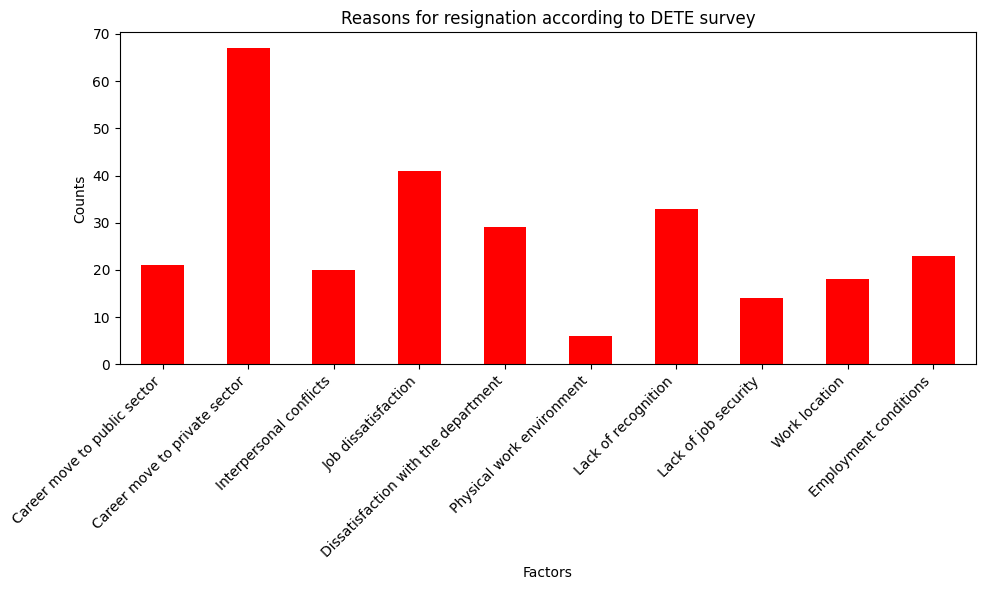

In [178]:
import matplotlib.pyplot as plt

renamed_columns_for_dete = {
    'career_move_to_public_sector': 'Career move to public sector',
    'career_move_to_private_sector': 'Career move to private sector',
    'interpersonal_conflicts': 'Interpersonal conflicts',
    'job_dissatisfaction': 'Job dissatisfaction',
    'dissatisfaction_with_the_department': 'Dissatisfaction with the department',
    'physical_work_environment': 'Physical work environment',
    'lack_of_recognition': 'Lack of recognition',
    'lack_of_job_security': 'Lack of job security',
    'work_location': 'Work location',
    'employment_conditions': 'Employment conditions'
}

filtered_counts = non_zero_true_columns[non_zero_true_columns.index.isin(renamed_columns_for_dete.keys())]

filtered_counts.index = filtered_counts.index.map(renamed_columns_for_dete)

filtered_counts.plot(kind='bar', figsize=(10, 6), color='red')
plt.title('Reasons for resignation according to DETE survey')
plt.xlabel('Factors')
plt.ylabel('Counts')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

According to the DETE survey, the most common reason for resignation is the fact that have a career move to private sector. As for dissatifaction regarding their job, a handful of respondants expressed dissatisfaction towards their job, with their department, or feeling a lack of recognition.

In [179]:
tafe_resignations_up

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service,dissatisfied,institute
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TAFE
4,6.341466e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,41 45,Permanent Full-time,Teacher (including LVT),3-4,3-4,0.0,TAFE
5,6.341475e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Female,56 or older,Contract/casual,Teacher (including LVT),7-10,7-10,0.0,TAFE
6,6.341520e+17,Barrier Reef Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,Career Move - Private Sector,-,-,Maternity/Family,...,Other,-,Male,20 or younger,Temporary Full-time,Administration (AO),3-4,3-4,0.0,TAFE
7,6.341537e+17,Southern Queensland Institute of TAFE,Delivery (teaching),2010.0,Resignation,-,-,-,-,-,...,Other,-,Male,46 50,Permanent Full-time,Teacher (including LVT),3-4,3-4,0.0,TAFE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
696,6.350660e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,-,Career Move - Private Sector,-,-,-,...,-,-,Male,21 25,Temporary Full-time,Operational (OO),5-6,5-6,0.0,TAFE
697,6.350668e+17,Barrier Reef Institute of TAFE,Delivery (teaching),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,Male,51-55,Temporary Full-time,Teacher (including LVT),1-2,1-2,0.0,TAFE
698,6.350677e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2013.0,Resignation,Career Move - Public Sector,-,-,-,-,...,-,-,NaN,NaN,NaN,NaN,NaN,NaN,0.0,TAFE
699,6.350704e+17,Tropical North Institute of TAFE,Delivery (teaching),2013.0,Resignation,-,-,-,-,-,...,Other,-,Female,51-55,Permanent Full-time,Teacher (including LVT),5-6,1-2,0.0,TAFE


In [180]:
analyze_tefe_columns = tafe_resignations_up[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']]

In [181]:
dissatisfied_employees = tafe_resignations_up[
    (tafe_resignations_up['Contributing Factors. Dissatisfaction'] == True) |
    (tafe_resignations_up['Contributing Factors. Job Dissatisfaction'] == True)
]

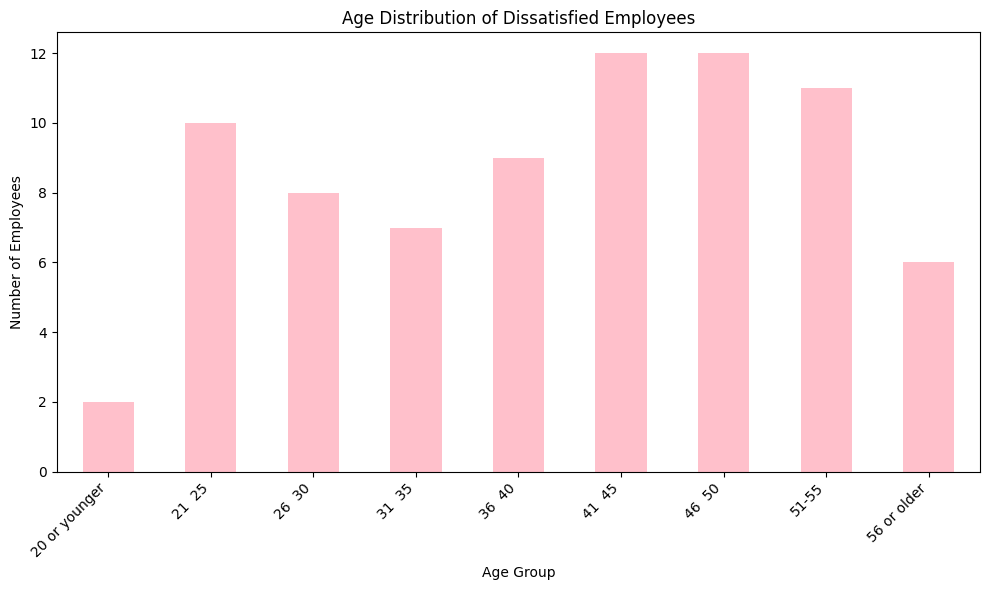

In [182]:
age_distribution.value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='pink')
plt.title('Age Distribution of Dissatisfied Employees')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [183]:
age_distribution = dissatisfied_employees['age']

In [184]:
tefe_factor_counts = tafe_resignations_up[analyze_tefe_columns].apply(lambda column: column.value_counts().get(True, 0))

In [185]:
non_zero_tefe_factor_columns = tefe_factor_counts[tefe_factor_counts > 0]

In [186]:
non_zero_tefe_factor_columns

,0
Contributing Factors. Dissatisfaction,55
Contributing Factors. Job Dissatisfaction,62


In [187]:
num_rows = tafe_resignations_up.shape[0]
print(f"The number of people resigning in TAFE survey is: {num_rows}")
total_true_values = non_zero_tefe_factor_columns.sum().sum()
print(f"The total number of dissatisfied employee is: {total_true_values}")
percentage_dissatisfied = int((total_true_values * 100) / num_rows)
print(f"The total number of dissatisfied employee makes up {percentage_dissatisfied}% of all resignated employees")

The number of people resigning in TAFE survey is: 340
The total number of dissatisfied employee is: 117
The total number of dissatisfied employee makes up 34% of all resignated employees


After analyzing the TAFE survey independently, we have two main findings about this survey:



1.   In the TAFE survey, 340 respondants resigned their jobs, to which 117 among these respondants showed some sense of dissatisfaction towards their jobs.
2.   Among the 117 respondants who resigned their jobs due to dissatisfaction, most of them were 41 to 55 years old. Respondants who were 21 to 30 years old, as well as those who were 36 to 40 years old, also shows a considerable amount of dissatisfaction towards their jobs.



In [188]:
# Combine the two DataFrames
combined = pd.concat([dete_resignations_up, tafe_resignations_up], ignore_index=True)

In [189]:
# Display the first few rows of the combined DataFrame to verify
print("Combined DataFrame:")
print(combined.head())
print("\nShape of combined DataFrame:", combined.shape)

Combined DataFrame:
     id                        separationtype cease_date  dete_start_date  \
0   4.0             Resignation-Other reasons    05/2012           2005.0   
1   6.0             Resignation-Other reasons    05/2012           1994.0   
2   9.0             Resignation-Other reasons    07/2012           2009.0   
3  10.0            Resignation-Other employer       2012           1997.0   
4  12.0  Resignation-Move overseas/interstate       2012           2009.0   

   role_start_date          position classification                region  \
0           2006.0           Teacher        Primary    Central Queensland   
1           1997.0  Guidance Officer            NaN        Central Office   
2           2009.0           Teacher      Secondary      North Queensland   
3           2008.0      Teacher Aide            NaN                   NaN   
4           2009.0           Teacher      Secondary  Far North Queensland   

          business_unit    employment_status  ...  \
0

In [190]:
# Display the shape of the updated DataFrame to verify the changes
print("Shape of combined_updated DataFrame:", combined.shape)
print("\nColumns in combined_updated DataFrame:")
print(combined.columns)

Shape of combined_updated DataFrame: (651, 54)

Columns in combined_updated DataFrame:
Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb', 'cease_year', 'institute_service',
       'institute', 'Institute', 'WorkArea',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Pr

In [191]:
combined

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,Contributing Factors. Maternity/Family,Contributing Factors. Dissatisfaction,Contributing Factors. Job Dissatisfaction,Contributing Factors. Interpersonal Conflict,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,role_service,dissatisfied
0,4.000000e+00,Resignation-Other reasons,05/2012,2005.0,2006.0,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6.000000e+00,Resignation-Other reasons,05/2012,1994.0,1997.0,Guidance Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,9.000000e+00,Resignation-Other reasons,07/2012,2009.0,2009.0,Teacher,Secondary,North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.000000e+01,Resignation-Other employer,2012,1997.0,2008.0,Teacher Aide,NaN,NaN,NaN,Permanent Part-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.200000e+01,Resignation-Move overseas/interstate,2012,2009.0,2009.0,Teacher,Secondary,Far North Queensland,NaN,Permanent Full-time,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
646,6.350660e+17,Resignation,2013.0,NaN,NaN,Operational (OO),NaN,NaN,NaN,Temporary Full-time,...,-,False,False,-,-,-,-,-,5-6,0.0
647,6.350668e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Temporary Full-time,...,-,False,False,-,-,-,-,-,1-2,0.0
648,6.350677e+17,Resignation,2013.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-,False,False,-,-,-,-,-,NaN,0.0
649,6.350704e+17,Resignation,2013.0,NaN,NaN,Teacher (including LVT),NaN,NaN,NaN,Permanent Full-time,...,-,False,False,-,-,-,Other,-,1-2,0.0


After assigned a new column to two updated dataframes "DETE" and "TAFE" to easily distinguish which institure that row's data is from, I combined the two dataframes.

In [192]:
# Convert the 'institute_service' column to string type
combined['institute_service'] = combined['institute_service'].astype(str)

In [193]:
# Use vectorized string methods to extract years of service
# This will extract digits from the string and return them
combined['institute_service'] = combined['institute_service'].str.extract('(\d+)')

In [194]:
# Double-check that you didn't miss extracting any digits
# Display unique values to check if there are any issues
print("Unique values in 'institute_service' after extraction:")
print(combined['institute_service'].unique())

Unique values in 'institute_service' after extraction:
['15460' '15521' '15339' nan '15705' '14609' '15886' '15856' '15948'
 '14852' '16070' '15825' '15917' '15978' '16039' '16009' '13329' '3' '7'
 '1' '11' '5' '20']


In [195]:
# Convert the extracted years of service to float
combined['institute_service'] = combined['institute_service'].astype(float)

In [196]:
# Display the updated DataFrame to verify the changes
print("Updated 'institute_service' column:")
print(combined[['institute_service']].head())

Updated 'institute_service' column:
   institute_service
0            15460.0
1            15460.0
2            15521.0
3            15339.0
4            15339.0


In [197]:
# Define the function to map years of service to career stages
def map_career_stage(val):
    if pd.isnull(val):  # Check if the value is NaN
        return np.nan
    elif val < 3:  # Less than 3 years
        return 'New'
    elif 3 <= val <= 6:  # 3 to 6 years
        return 'Experienced'
    elif 7 <= val <= 10:  # 7 to 10 years
        return 'Established'
    else:  # 11 or more years
        return 'Veteran'

In [198]:
# Convert 'institute_service' to string and extract numeric values
combined['institute_service'] = combined['institute_service'].astype(str)

In [199]:
# Extract the numeric values (years) from the 'institute_service' column
combined['institute_service'] = combined['institute_service'].str.extract('(\d+)')

In [200]:
# Double check that all digits are extracted
print("Unique values in 'institute_service' after extraction:")
print(combined['institute_service'].unique())

Unique values in 'institute_service' after extraction:
['15460' '15521' '15339' nan '15705' '14609' '15886' '15856' '15948'
 '14852' '16070' '15825' '15917' '15978' '16039' '16009' '13329' '3' '7'
 '1' '11' '5' '20']


In [201]:
# Convert the extracted years of service to float
combined['institute_service'] = combined['institute_service'].astype(float)

In [202]:
# Define the function to map years of service to career stages
def map_career_stage(val):
    if pd.isnull(val):  # Check if the value is NaN
        return np.nan
    elif val < 3:  # Less than 3 years
        return 'New'
    elif 3 <= val <= 6:  # 3 to 6 years
        return 'Experienced'
    elif 7 <= val <= 10:  # 7 to 10 years
        return 'Established'
    else:  # 11 or more years
        return 'Veteran'

In [203]:
# Apply the function to the 'institute_service' column
combined['service_cat'] = combined['institute_service'].apply(map_career_stage)

In [204]:
# Display the updated DataFrame to verify the changes
print("Updated DataFrame with service_cat:")
print(combined[['institute_service', 'service_cat']].head(60))

Updated DataFrame with service_cat:
    institute_service service_cat
0             15460.0     Veteran
1             15460.0     Veteran
2             15521.0     Veteran
3             15339.0     Veteran
4             15339.0     Veteran
5             15339.0     Veteran
6             15339.0     Veteran
7                 NaN         NaN
8             15339.0     Veteran
9             15339.0     Veteran
10            15339.0     Veteran
11            15339.0     Veteran
12            15339.0     Veteran
13            15339.0     Veteran
14            15339.0     Veteran
15            15339.0     Veteran
16            15339.0     Veteran
17                NaN         NaN
18            15339.0     Veteran
19            15339.0     Veteran
20            15339.0     Veteran
21            15339.0     Veteran
22            15339.0     Veteran
23            15339.0     Veteran
24            15339.0     Veteran
25            15339.0     Veteran
26            15339.0     Veteran
27          

In [205]:
print("Unique values in service_cat:")
print(combined['service_cat'].unique())

Unique values in service_cat:
['Veteran' nan 'Experienced' 'Established' 'New']


Here I extracted the vales from the 'institute_service' column and convert them into float. This step is essential to categorize their level of veterancy in the institute.

I add a new column called 'service_cat', which categorized their veterancy according to how many years they worked.

In [206]:
import matplotlib.pyplot as plt
%matplotlib inline

In [207]:
print("\nValue counts of 'dissatisfied' column (including NaN values):")
print(combined['dissatisfied'].value_counts(dropna=False))


Value counts of 'dissatisfied' column (including NaN values):
dissatisfied
NaN    319
0.0    241
1.0     91
Name: count, dtype: int64


In [208]:
# Fill missing values in 'dissatisfied' column with most frequent value
most_frequent = combined['dissatisfied'].mode()[0]
combined['dissatisfied'] = combined['dissatisfied'].fillna(most_frequent)

In [209]:
print("\nValue counts of 'dissatisfied' column (after filling missing values):")
print(combined['dissatisfied'].value_counts())


Value counts of 'dissatisfied' column (after filling missing values):
dissatisfied
0.0    560
1.0     91
Name: count, dtype: int64


In [212]:
# Use pivot_table to calculate the percentage of dissatisfied employees in each 'service_cat' group
dissatisfaction_by_service = combined.pivot_table(index='service_cat', values='dissatisfied')

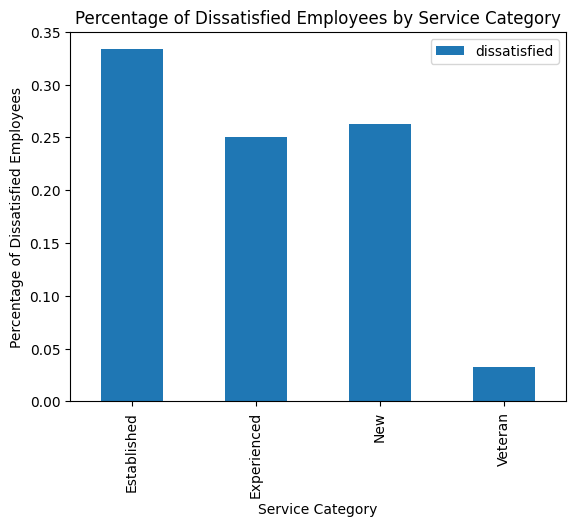

In [213]:
# Plot the results as a bar chart
dissatisfaction_by_service.plot(kind='bar')
plt.title('Percentage of Dissatisfied Employees by Service Category')
plt.xlabel('Service Category')
plt.ylabel('Percentage of Dissatisfied Employees')
plt.show()

As we can see from this graph, employees who seved 7 to 10 years are the ones that are most likely to dissatisfied with their companies (33%). Employees who are new (26%) or have 3 to 6 years level of experience (25%) also share certain amount of dissatisfaction.

In [214]:
# Handle the remaining missing values
# Fill any remaining NaN values in the 'dissatisfied' column with the most frequent value
combined['dissatisfied'] = combined['dissatisfied'].fillna(combined['dissatisfied'].mode()[0])

In [215]:
# Aggregate data according to the service_cat column
dissatisfaction_by_service = combined.pivot_table(index='service_cat', values='dissatisfied', aggfunc='mean')

In [216]:
print("\nPercentage of dissatisfied employees by service category:")
print(dissatisfaction_by_service)


Percentage of dissatisfied employees by service category:
             dissatisfied
service_cat              
Established      0.333333
Experienced      0.250000
New              0.262774
Veteran          0.032362


In [217]:
combined.to_csv('combine.csv', index=False)